Q3


[[ 7.27462848e-01 -1.02257356e-02  1.11734672e+02]
 [-2.47956607e-01  3.25207324e-01  4.93158931e+01]
 [-1.40881830e-03  2.03104225e-05  1.00000000e+00]]


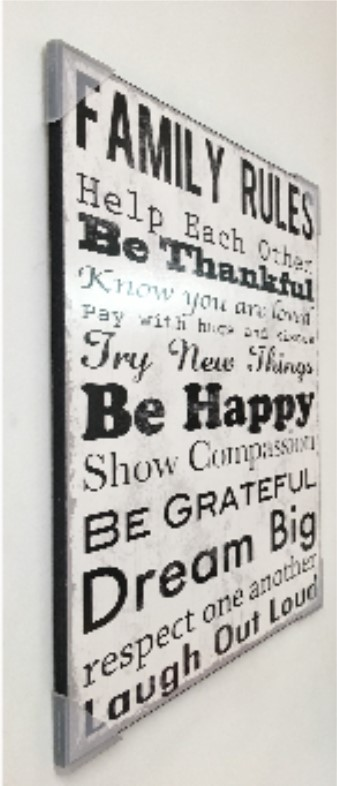

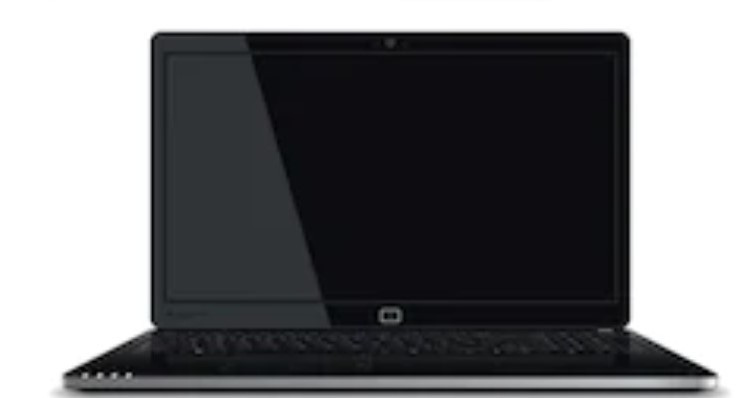

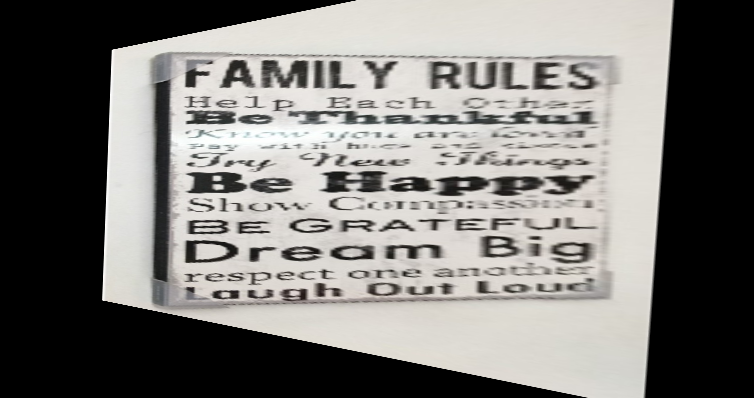

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

if __name__ == '__main__' :

    im_src = cv2.imread('1.jpg')
    pts_src = np.array([[57, 39], [317, 186], [67, 746],[323, 607]])

    im_dst = cv2.imread('view2.jpg')
    pts_dst = np.array([[166, 52],[611, 56],[166, 299],[611, 299]])
    A = []
    for i in range(0, len(pts_src)):
        x, y = pts_src[i][0], pts_src[i][1]
        u, v = pts_dst[i][0], pts_dst[i][1]
        A.append([x, y, 1, 0, 0, 0, -u*x, -u*y, -u])
        A.append([0, 0, 0, x, y, 1, -v*x, -v*y, -v])
    A = np.asarray(A)
    U, S, Vh = np.linalg.svd(A)
    L = Vh[-1,:] / Vh[-1,-1]
    H = L.reshape(3, 3)
    print(H)
    im_out = cv2.warpPerspective(im_src, H, (im_dst.shape[1],im_dst.shape[0]))
    
    cv2_imshow(im_src)
    cv2_imshow(im_dst)
    cv2_imshow(im_out)

    cv2.waitKey(0)

[[ 5.77995103e-01 -1.28894003e-03  2.40000000e+02]
 [-1.34008779e-01  4.34219723e-01  2.46000000e+02]
 [-3.35527397e-04 -5.37058342e-06  1.00000000e+00]]


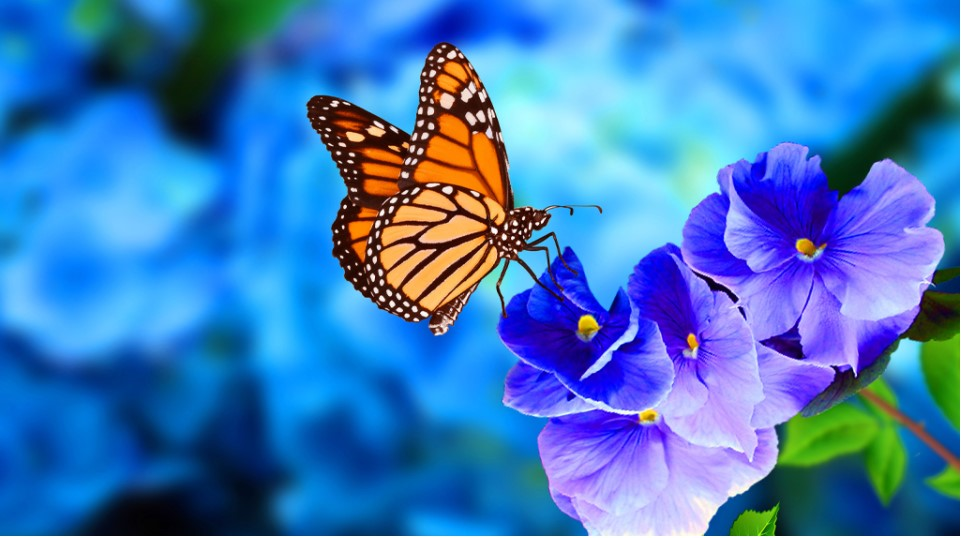

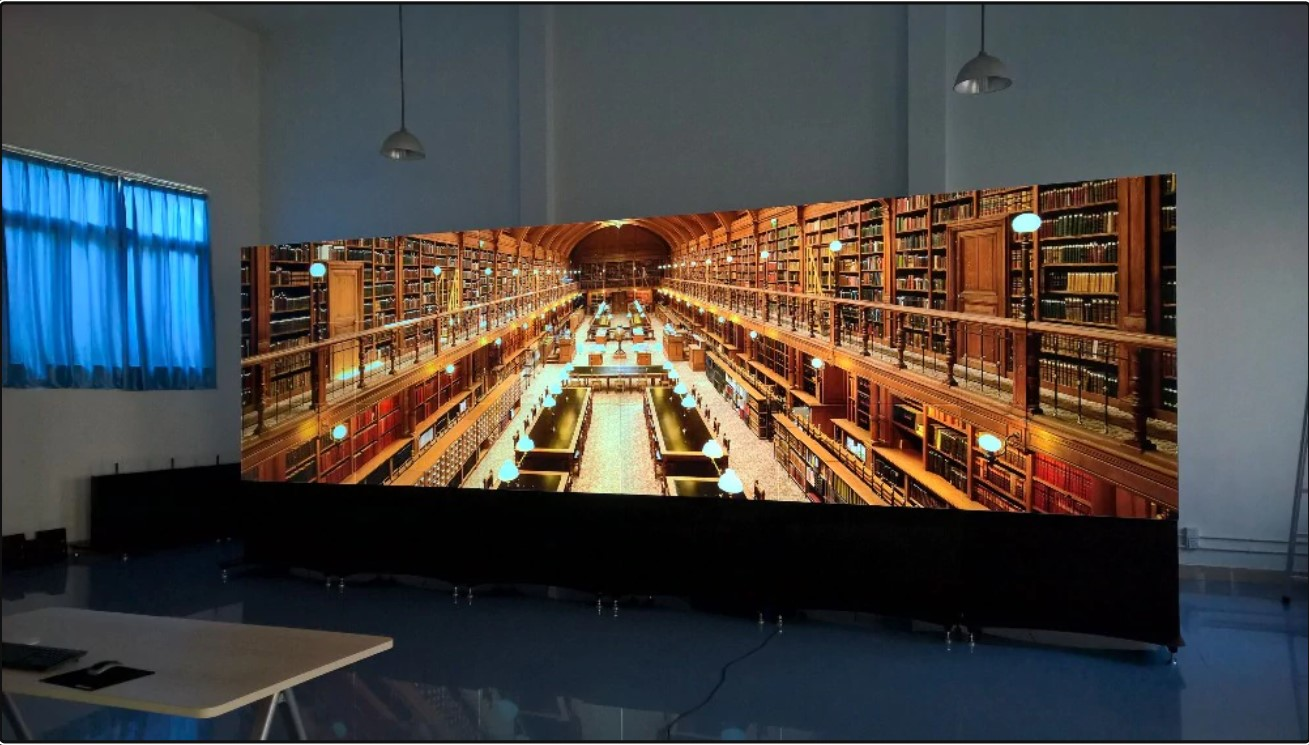

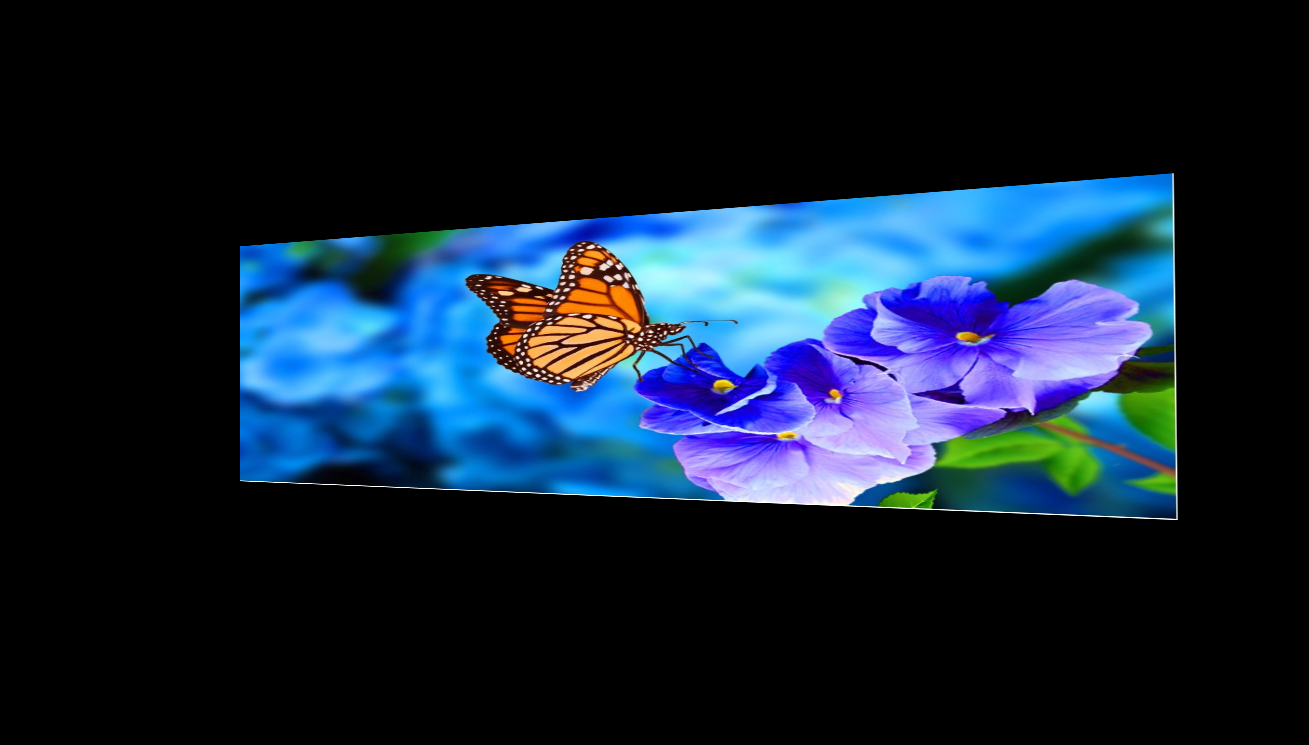

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

if __name__ == '__main__' :

    im_src = cv2.imread('2.jpg')
    pts_src = np.array([[0, 0], [961, 0], [0, 538],[961, 538]])

    im_dst = cv2.imread('3.jpg')
    pts_dst = np.array([[240, 246],[1174, 173],[240, 481],[1178, 520]])

    A = []
    for i in range(0, len(pts_src)):
        x, y = pts_src[i][0], pts_src[i][1]
        u, v = pts_dst[i][0], pts_dst[i][1]
        A.append([x, y, 1, 0, 0, 0, -u*x, -u*y, -u])
        A.append([0, 0, 0, x, y, 1, -v*x, -v*y, -v])
    A = np.asarray(A)
    U, S, Vh = np.linalg.svd(A)
    L = Vh[-1,:] / Vh[-1,-1]
    H = L.reshape(3, 3)
    print(H)
    im_out = cv2.warpPerspective(im_src, H, (im_dst.shape[1],im_dst.shape[0]))
    
    cv2_imshow(im_src)
    cv2_imshow(im_dst)
    cv2_imshow(im_out)

    cv2.waitKey(0)


Q4


a)


In [1]:
import cv2
from pylab import *
from numpy import *
from scipy import linalg

def compute_fundamental(x1,x2):
    """    Computes the fundamental matrix from corresponding points 
        (x1,x2 3*n arrays) using the 8 point algorithm.
        Each row in the A matrix below is constructed as
        [x'*x, x'*y, x', y'*x, y'*y, y', x, y, 1] """
    
    n = x1.shape[1]
    if x2.shape[1] != n:
        raise ValueError("Number of points don't match.")
    
    # build matrix for equations
    A = zeros((n,9))
    for i in range(n):
        A[i] = [x1[0,i]*x2[0,i], x1[0,i]*x2[1,i], x1[0,i]*x2[2,i],
                x1[1,i]*x2[0,i], x1[1,i]*x2[1,i], x1[1,i]*x2[2,i],
                x1[2,i]*x2[0,i], x1[2,i]*x2[1,i], x1[2,i]*x2[2,i] ]
            
    # compute linear least square solution
    U,S,V = linalg.svd(A)
    F = V[-1].reshape(3,3)
        
    # constrain F
    # make rank 2 by zeroing out last singular value
    U,S,V = linalg.svd(F)
    S[2] = 0
    F = dot(U,dot(diag(S),V))
    
    return F/F[2,2]
view1 = cv2.imread('view1.jpg')
view2 = cv2.imread('view2.jpg')
view3 = cv2.imread('view3.jpg')
points1 = [[246,64,1], [330,81,1],[446,61,1],[246,177,1],[446,182,1],[246,266,1],[329,282,1],[445,299,1]]
points1 = np.transpose(points1)

points2 = [[165,53,1], [388,53,1],[609,53,1],[165,176,1],[609,176,1],[165,299,1],[388,299,1],[609,299,1]]
points2 = np.transpose(points2)

points3 = [[34,29,1], [152,51,1],[228,65,1],[34,151,1],[231,150,1],[330,270,1],[152,250,1],[229,235,1]]
points3 = np.transpose(points3)

F11 = compute_fundamental(points1, points2)
print(F11)

F22 = compute_fundamental(points2, points3)
print(F22)

F33 = compute_fundamental(points3, points1)
print(F33)

[[-4.47963079e-05  6.42290041e-04 -2.35076039e-02]
 [-2.80895290e-04 -1.21486431e-05  3.46189288e-02]
 [ 4.41806760e-02 -1.41123531e-01  1.00000000e+00]]
[[ 1.96977719e-05  4.45825141e-05 -1.78303454e-02]
 [-1.24405072e-04  6.10299768e-06  3.53463463e-02]
 [ 3.28584298e-02 -4.00944413e-02  1.00000000e+00]]
[[ 4.76546289e-06 -1.10568410e-05  1.73432914e-03]
 [ 1.60771689e-05 -9.83742240e-08 -3.52345871e-03]
 [-4.39091645e-03 -1.22711431e-04  1.00000000e+00]]


c)

In [7]:
!pip uninstall opencv-python
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16

Uninstalling opencv-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/cv2/*
    /usr/local/lib/python3.6/dist-packages/opencv_python-4.1.2.30.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 25.0MB 1.5MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 30.6MB 154kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [2]:
sift = cv2.xfeatures2d.SIFT_create() 
def get_fundamental_matrix(left_image, right_image):
    img1 = left_image
    img2 = right_image

    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)

    # FLANN parameters
    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks=50)

    flann = cv2.FlannBasedMatcher(index_params,search_params)
    matches = flann.knnMatch(des1,des2,k=2)

    good = []
    pts1 = []
    pts2 = []

    # ratio test as per Lowe's paper
    for i,(m,n) in enumerate(matches):
        if m.distance < 0.8*n.distance:
            good.append(m)
            pts2.append(kp2[m.trainIdx].pt)
            pts1.append(kp1[m.queryIdx].pt)

    pts1 = np.array(pts1, dtype='float32')
    pts2 = np.array(pts2, dtype='float32')

    F, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_LMEDS)
    return F
F1 = get_fundamental_matrix(view1,view2)
print(F1)
F2 = get_fundamental_matrix(view2,view3)
print(F2)
F3 = get_fundamental_matrix(view3,view1)
print(F3)

[[-1.84105110e-05  1.32251923e-04 -3.17855356e-02]
 [-1.45883256e-04  2.14221823e-04  5.76211470e-02]
 [ 6.19524124e-02 -1.59587892e-01  1.00000000e+00]]
[[-1.43733846e-03  1.05952499e-03  5.57935131e-01]
 [ 2.01102984e-03  1.37468423e-03 -1.32878975e+00]
 [ 4.40584182e-02 -1.26828830e-01  1.00000000e+00]]
[[ 2.20585944e-08  8.85851314e-06 -2.70076913e-03]
 [ 5.84421062e-06 -1.87499044e-06  4.80072999e-04]
 [-1.97345212e-03 -3.17906189e-03  1.00000000e+00]]


e)

In [4]:
mse1 = ((F11 - F1)**2).mean(axis=None)
mse2 = ((F22 - F2)**2).mean(axis=None)
mse3 = ((F33 - F3)**2).mean(axis=None)
print("MSE1:", mse1)
print("MSE2:", mse2)
print("MSE3:", mse3)

MSE1: 0.00013941374563249947
MSE2: 0.24444789359681168
MSE3: 5.6538113084864814e-06
